In [6]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import seaborn as sns
from matplotlib.patches import Patch
import os

In [7]:
# READ nas file
# Function to extract epoch from the first few rows of the CSV file
def extract_epoch_from_header(file):
    # Read the first few lines to find the epoch (assuming it's in a comment or a header)
    with open(file, 'r') as f:
        skiprow = f.readline()
        skiprow = skiprow.strip().split()[0]
        for line in f:
            if "startdate:" in line.lower():  # Assuming the word 'epoch' is present in the line
                # Extract the epoch date (this assumes the date is the second item in the line)
                epoch = line.strip().split()[1]
                return int(skiprow)-1, epoch[0:4]+"-"+epoch[4:6]+"-"+epoch[6:8]+" "+epoch[8:10]+":"+epoch[10:12]+":"+epoch[12:14]
    return None  # Return None if no epoch is found

# Function to load and adjust time for each CSV
def load_and_adjust_time(file):
    # Try to extract the epoch from the header or a specific column
    nskiprows,epoch = extract_epoch_from_header(file)
   
    if epoch is None:
        raise ValueError(f"Could not find epoch for file: {file}")
   
    # Load the actual data (skipping header if necessary)
    df = pd.read_csv(file, skiprows=nskiprows,sep="\s+")  # Adjust skiprows based on where the data starts
   
    # Convert 'time' column to a datetime, assuming it's in days
    # Adjust time column to start from the epoch time found in the file
    df['starttime_dt'] = pd.to_timedelta(df['start_time'], unit='D') + pd.Timestamp(epoch)
    df = df[df.numflag_wind_speed != 0.999]
    df.index = df["starttime_dt"]
    #data["starttime_dt"] = pd.to_datetime(data["starttime"],unit='D',origin=pd.Timestamp('2015-01-01 00:41:00'))
   
    # Return the adjusted DataFrame
    return df

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1575/1752878219.py:24: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, skiprows=nskiprows,sep="\s+")  # Adjust skiprows based on where the data starts


In [38]:
file = '../data_meteo/IT0014R.20240101000000.20250214101300.aws..met.1y.1mn...lev0.nas'
df_CG = load_and_adjust_time(file)



In [41]:
#loop for rounding to the hours
df_CG["starttime_dt"] = [i.round("min") for i in df_CG["starttime_dt"]]
df_CG["starttime_dt"]

starttime_dt
2024-01-01 00:00:00.000000000   2024-01-01 00:00:00
2024-01-01 00:00:59.961599999   2024-01-01 00:01:00
2024-01-01 00:02:00.009600000   2024-01-01 00:02:00
2024-01-01 00:02:59.971200000   2024-01-01 00:03:00
2024-01-01 00:04:00.019200000   2024-01-01 00:04:00
                                        ...        
2024-06-24 07:11:00.038400000   2024-06-24 07:11:00
2024-06-24 07:12:00.000000000   2024-06-24 07:12:00
2024-06-24 07:12:59.961600000   2024-06-24 07:13:00
2024-06-24 07:14:00.009600000   2024-06-24 07:14:00
2024-06-24 07:14:59.971200000   2024-06-24 07:15:00
Name: starttime_dt, Length: 174727, dtype: datetime64[ns]

In [42]:
df_CG

,start_time,end_time,wind_speed,numflag_wind_speed,wind_direction,numflag_wind_direction,temperature,numflag_temperature,relative_humidity,numflag_relative_humidity,pressure,numflag_pressure,global_radiation,numflag_global_radiation,starttime_dt
starttime_dt,,,,,,,,,,,,,,,
2024-01-01 00:00:00.000000000,0.000000,0.000694,2.3,0.0,53,0.0,11.4,0.0,92,0.0,1018.9,0.0,-1.00,0.000,2024-01-01 00:00:00
2024-01-01 00:00:59.961599999,0.000694,0.001389,2.1,0.0,55,0.0,11.4,0.0,92,0.0,1018.9,0.0,-0.77,0.000,2024-01-01 00:01:00
2024-01-01 00:02:00.009600000,0.001389,0.002083,2.0,0.0,55,0.0,11.4,0.0,93,0.0,1018.9,0.0,-0.53,0.000,2024-01-01 00:02:00
2024-01-01 00:02:59.971200000,0.002083,0.002778,2.0,0.0,48,0.0,11.5,0.0,93,0.0,1018.9,0.0,-0.52,0.000,2024-01-01 00:03:00
2024-01-01 00:04:00.019200000,0.002778,0.003472,2.2,0.0,45,0.0,11.5,0.0,93,0.0,1018.9,0.0,-0.74,0.000,2024-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24 07:11:00.038400000,175.299306,175.300000,3.1,0.0,344,0.0,20.5,0.0,87,0.0,1011.7,0.0,9999.99,0.999,2024-06-24 07:11:00
2024-06-24 07:12:00.000000000,175.300000,175.300694,3.1,0.0,340,0.0,20.4,0.0,87,0.0,1011.7,0.0,9999.99,0.999,2024-06-24 07:12:00
2024-06-24 07:12:59.961600000,175.300694,175.301389,2.2,0.0,350,0.0,20.3,0.0,87,0.0,1011.7,0.0,9999.99,0.999,2024-06-24 07:13:00


In [43]:

df_CG.set_index('starttime_dt', inplace=True)
# Check if there format hh:mm:ss is in the index
formatted_df_CG = df_CG.copy()
formatted_df_CG.index = df_CG.index.strftime('%Y-%m-%d %H:%M:%S')
print(formatted_df_CG.head())

                     start_time  end_time  wind_speed  numflag_wind_speed  \
starttime_dt                                                                
2024-01-01 00:00:00    0.000000  0.000694         2.3                 0.0   
2024-01-01 00:01:00    0.000694  0.001389         2.1                 0.0   
2024-01-01 00:02:00    0.001389  0.002083         2.0                 0.0   
2024-01-01 00:03:00    0.002083  0.002778         2.0                 0.0   
2024-01-01 00:04:00    0.002778  0.003472         2.2                 0.0   

                     wind_direction  numflag_wind_direction  temperature  \
starttime_dt                                                               
2024-01-01 00:00:00              53                     0.0         11.4   
2024-01-01 00:01:00              55                     0.0         11.4   
2024-01-01 00:02:00              55                     0.0         11.4   
2024-01-01 00:03:00              48                     0.0         11.5   
2024

In [44]:

df_CG.drop(columns=['start_time','end_time', 'relative_humidity', 'numflag_relative_humidity', 'pressure', 'numflag_pressure', 'global_radiation', 'numflag_global_radiation'], inplace=True)
# Option 1: Using set_index()

df_CG.head()

,wind_speed,numflag_wind_speed,wind_direction,numflag_wind_direction,temperature,numflag_temperature
starttime_dt,,,,,,
2024-01-01 00:00:00,2.3,0.0,53,0.0,11.4,0.0
2024-01-01 00:01:00,2.1,0.0,55,0.0,11.4,0.0
2024-01-01 00:02:00,2.0,0.0,55,0.0,11.4,0.0
2024-01-01 00:03:00,2.0,0.0,48,0.0,11.5,0.0
2024-01-01 00:04:00,2.2,0.0,45,0.0,11.5,0.0


In [45]:
print("Columns in DataFrame:", df_CG.columns.tolist())

Columns in DataFrame: ['wind_speed', 'numflag_wind_speed', 'wind_direction', 'numflag_wind_direction', 'temperature', 'numflag_temperature']


In [ ]:



# Drop rows where 'values' equals 9.999999999
filt_df_CG = df_CG[df_CG['wind_speed'] != 9.999999999]
filt_df_CG = df_CG[df_CG['wind_speed'] != 999.99]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9999.999999]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9999.99]
filt_df_CG = df_CG[df_CG['wind_speed'] != 99999.99]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9999]
filt_df_CG = df_CG[df_CG['wind_speed'] != 99.99]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9.999999999]
filt_df_CG = df_CG[df_CG['wind_speed'] != 999]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9.999999999]
filt_df_CG = df_CG[df_CG['wind_speed'] != 99999.99]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9.999999999]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9999.99]
filt_df_CG = df_CG[df_CG['wind_speed'] != 9.999999999]

count = len(df_CG)
# Count remaining lines
remaining_count = len(filt_df_CG)

print("Filtered DataFrame:")
#print(filt_df_CG)
print(f"\nNumber of lines before dropping: {count}")
print(f"\nNumber of lines after dropping: {remaining_count}")


Filtered DataFrame:

Number of lines before dropping: 174727

Number of lines after dropping: 174727


In [47]:
filt_df_CG


,wind_speed,numflag_wind_speed,wind_direction,numflag_wind_direction,temperature,numflag_temperature
starttime_dt,,,,,,
2024-01-01 00:00:00,2.3,0.0,53,0.0,11.4,0.0
2024-01-01 00:01:00,2.1,0.0,55,0.0,11.4,0.0
2024-01-01 00:02:00,2.0,0.0,55,0.0,11.4,0.0
2024-01-01 00:03:00,2.0,0.0,48,0.0,11.5,0.0
2024-01-01 00:04:00,2.2,0.0,45,0.0,11.5,0.0
...,...,...,...,...,...,...
2024-06-24 07:11:00,3.1,0.0,344,0.0,20.5,0.0
2024-06-24 07:12:00,3.1,0.0,340,0.0,20.4,0.0
2024-06-24 07:13:00,2.2,0.0,350,0.0,20.3,0.0


In [48]:
# Assuming df_filtered is your DataFrame with datetime index 'starttime_dt'

# Define date range
start_date = '2024-01-01'
end_date = '2024-02-20'

# Create subset based on date range using loc (inclusive of both dates)
CG_wind_wint = filt_df_CG.loc[start_date:end_date]


# Print information about the subset
print(f"Date range: {start_date} to {end_date}")
print(f"Original DataFrame shape: {filt_df_CG.shape}")
print(f"Subset DataFrame shape: {CG_wind_wint.shape}")
print(f"Number of rows in subset: {len(CG_wind_wint)}")

# Show first few rows of the subset
print("\nFirst 5 rows of subset:")
print(CG_wind_wint.head())

Date range: 2024-01-01 to 2024-02-20
Original DataFrame shape: (174727, 6)
Subset DataFrame shape: (71860, 6)
Number of rows in subset: 71860

First 5 rows of subset:
                     wind_speed  numflag_wind_speed  wind_direction  \
starttime_dt                                                          
2024-01-01 00:00:00         2.3                 0.0              53   
2024-01-01 00:01:00         2.1                 0.0              55   
2024-01-01 00:02:00         2.0                 0.0              55   
2024-01-01 00:03:00         2.0                 0.0              48   
2024-01-01 00:04:00         2.2                 0.0              45   

                     numflag_wind_direction  temperature  numflag_temperature  
starttime_dt                                                                   
2024-01-01 00:00:00                     0.0         11.4                  0.0  
2024-01-01 00:01:00                     0.0         11.4                  0.0  
2024-01-01 00:0

In [14]:


# Apply condition: keep rows where ws_2m > 0.5
CG_wind_wint_filt = CG_wind_wint[CG_wind_wint['wind_speed'] > 0.5]



# Count lines before and after
original_count = len(CG_wind_wint)
filtered_count = len(CG_wind_wint_filt)

print("Original DataFrame:")
print(CG_wind_wint)
print(f"\nOriginal count: {original_count}")

print("\nFiltered DataFrame (ws_2m > 0.5):")
print(CG_wind_wint_filt)
print(f"\nFiltered count: {filtered_count}")

Original DataFrame:
                     wind_speed  numflag_wind_speed  wind_direction  \
starttime_dt                                                          
2024-01-01 00:00:00         2.3                 0.0              53   
2024-01-01 00:00:00         2.1                 0.0              55   
2024-01-01 00:00:00         2.0                 0.0              55   
2024-01-01 00:00:00         2.0                 0.0              48   
2024-01-01 00:00:00         2.2                 0.0              45   
...                         ...                 ...             ...   
2024-02-20 23:00:00         5.4                 0.0              68   
2024-02-20 23:00:00         6.1                 0.0              48   
2024-02-20 23:00:00         3.4                 0.0              15   
2024-02-20 23:00:00         3.5                 0.0              38   
2024-02-20 23:00:00         3.8                 0.0              53   

                     numflag_wind_direction  temperature

In [51]:
#Read csv meteo file by SIAS 

# More precise: replace only in the 'Valore' column
df_SIAS = pd.read_csv('../data_meteo/nhxnax101_MisureEn_MazVenDV_3_20251121164858.txt', sep=';', encoding='latin-1')

# Replace commas in specific column
df_SIAS['Valore'] = df_SIAS['Valore'].astype(str).str.replace(',', '.', regex=False)

# Convert to numeric
df_SIAS['Valore'] = pd.to_numeric(df_SIAS['Valore'], errors='coerce')

print("After replacing commas in Valore column:")
print(df_SIAS.head())
print(f"Valore dtype: {df_SIAS['Valore'].dtype}")

After replacing commas in Valore column:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore  
0           00:00     0.3  
1           01:00     0.6  
2           02:00     0.4  
3           03:00     0.3  
4           04:00     0.6  
Valore dtype: float64


In [54]:
# Manual datetime conversion
df_SIAS['DataOra'] = pd.to_datetime(
    df_SIAS['Data rilevazione'] + ' ' + df_SIAS['Ora rilevazione'], 
    dayfirst=True,  # Important for DD/MM/YYYY format
    format='%d/%m/%Y %H:%M'
)

# Verify datetime conversion
print("After datetime conversion:")
print(df_SIAS[['Data rilevazione', 'Ora rilevazione', 'DataOra']].head())
print(f"\nDataOra dtype: {df_SIAS['DataOra'].dtype}")

# Now extract time components
df_SIAS['Year'] = df_SIAS['DataOra'].dt.year
df_SIAS['Month'] = df_SIAS['DataOra'].dt.month
df_SIAS['YearMonth'] = df_SIAS['DataOra'].dt.to_period('M')



print("\nDataFrame with time components:")
print(df_SIAS.head())

After datetime conversion:
  Data rilevazione Ora rilevazione             DataOra
0       01/01/2023           00:00 2023-01-01 00:00:00
1       01/01/2023           01:00 2023-01-01 01:00:00
2       01/01/2023           02:00 2023-01-01 02:00:00
3       01/01/2023           03:00 2023-01-01 03:00:00
4       01/01/2023           04:00 2023-01-01 04:00:00

DataOra dtype: datetime64[ns]

DataFrame with time components:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore             DataOra  Year  Month YearMonth  
0           00:00     0.3 2023-01-01 00:00:00  2023

In [52]:
df_SIAS

,Stazione,Grandezza,Data rilevazione,Ora rilevazione,Valore
0,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/01/2023,00:00,0.3
1,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/01/2023,01:00,0.6
2,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/01/2023,02:00,0.4
3,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/01/2023,03:00,0.3
4,Mazara del Vallo,Velocità vento 2m istantanea (m/s),01/01/2023,04:00,0.6
...,...,...,...,...,...
49099,Mazara del Vallo,Direzione vento 2m istantanea (°),19/10/2025,19:00,347.0
49100,Mazara del Vallo,Direzione vento 2m istantanea (°),19/10/2025,20:00,5.0
49101,Mazara del Vallo,Direzione vento 2m istantanea (°),19/10/2025,21:00,6.0
49102,Mazara del Vallo,Direzione vento 2m istantanea (°),19/10/2025,22:00,261.0


In [55]:
# Define date range
start_date = '2024-01-01'
end_date = '2024-02-20'

# Create subset
mask = (df_SIAS['DataOra'] >= start_date) & (df_SIAS['DataOra'] <= end_date)
df_SIAS_wint = df_SIAS.loc[mask].copy()

print(f"Original data: {len(df_SIAS)} rows")
print(f"Subset data: {len(df_SIAS_wint)} rows")
print(f"Date range in subset: {df_SIAS_wint['DataOra'].min()} to {df_SIAS_wint['DataOra'].max()}")

Original data: 49104 rows
Subset data: 2402 rows
Date range in subset: 2024-01-01 00:00:00 to 2024-02-20 00:00:00


In [56]:
# Filter for wind speed and direction data only
vv2m_SIAS_wint = df_SIAS_wint[df_SIAS_wint['Grandezza'].str.contains('Velocità vento 2m istantanea', na=False)].copy()
vv2m_SIAS_wint ['ws_2m'] = df_SIAS_wint ['Valore']
vD2m_SIAS_wint = df_SIAS_wint[df_SIAS_wint['Grandezza'].str.contains('Direzione vento 2m istantanea', na=False)].copy()
vD2m_SIAS_wint ['wd_2m'] = vD2m_SIAS_wint ['Valore']
# Filter for wind speed
#filtered_vv2m_SIAS_subset = vv2m_SIAS_wint[vv2m_SIAS_wint ['ws_2m'] > 0.5]
#row_count = len(filtered_vv2m_SIAS_subset )


In [57]:
# Select only the columns you need to avoid any conflicts
wind_SIAS_wint = vv2m_SIAS_wint[['DataOra', 'ws_2m' ]].merge(
    vD2m_SIAS_wint[['DataOra', 'wd_2m']],
    on='DataOra',
    how='inner'
)
wind_SIAS_wint['month'] = wind_SIAS_wint['DataOra'].dt.month 
print(f"wind_5_24_25 created with {len(wind_SIAS_wint)} rows")
#print(f"filtered_vv2m_SIAS_subset ws>0.5 created with {len(filtered_vv2m_SIAS_subset)} rows")
print(f"vD2m_SIAS_wint created with {len(vD2m_SIAS_wint)} rows")

wind_5_24_25 created with 1201 rows
vD2m_SIAS_wint created with 1201 rows


In [58]:
wind_SIAS_wint .head()

,DataOra,ws_2m,wd_2m,month
0,2024-01-01 00:00:00,1.1,157.0,1
1,2024-01-01 01:00:00,0.9,23.0,1
2,2024-01-01 02:00:00,0.2,351.0,1
3,2024-01-01 03:00:00,0.5,140.0,1
4,2024-01-01 04:00:00,0.5,13.0,1


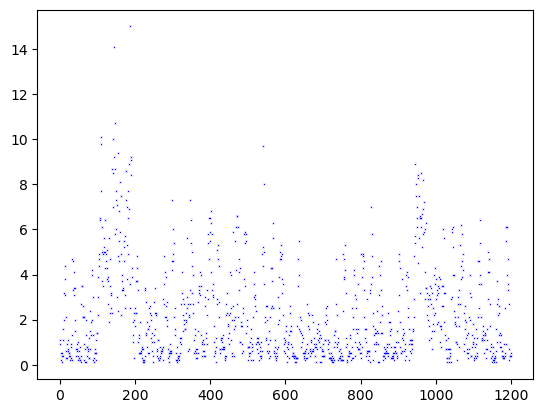

In [59]:
plt.scatter(wind_SIAS_wint.index, wind_SIAS_wint['ws_2m' ], marker='x', s=0.06, color='blue', label='Temperature')

In [60]:




# Apply condition: keep rows where ws_2m > 0.5
wind_SIAS_wint_filt = wind_SIAS_wint[wind_SIAS_wint['ws_2m'] > 0.5]

# Count lines before and after
original_count = len(wind_SIAS_wint)
filtered_count = len(wind_SIAS_wint_filt)

print("Original DataFrame:")
print(wind_SIAS_wint)
print(f"\nOriginal count: {original_count}")

print("\nFiltered DataFrame (ws_2m > 0.5):")
print(wind_SIAS_wint_filt)
print(f"\nFiltered count: {filtered_count}")



Original DataFrame:
                 DataOra  ws_2m  wd_2m  month
0    2024-01-01 00:00:00    1.1  157.0      1
1    2024-01-01 01:00:00    0.9   23.0      1
2    2024-01-01 02:00:00    0.2  351.0      1
3    2024-01-01 03:00:00    0.5  140.0      1
4    2024-01-01 04:00:00    0.5   13.0      1
...                  ...    ...    ...    ...
1196 2024-02-19 20:00:00    0.2   71.0      2
1197 2024-02-19 21:00:00    0.4  148.0      2
1198 2024-02-19 22:00:00    0.4  327.0      2
1199 2024-02-19 23:00:00    0.4  162.0      2
1200 2024-02-20 00:00:00    0.5  312.0      2

[1201 rows x 4 columns]

Original count: 1201

Filtered DataFrame (ws_2m > 0.5):
                 DataOra  ws_2m  wd_2m  month
0    2024-01-01 00:00:00    1.1  157.0      1
1    2024-01-01 01:00:00    0.9   23.0      1
7    2024-01-01 07:00:00    1.1  195.0      1
9    2024-01-01 09:00:00    1.6  181.0      1
10   2024-01-01 10:00:00    3.2  228.0      1
...                  ...    ...    ...    ...
1191 2024-02-19 15:00:00

In [61]:
wind_SIAS_wint_filt.head()


,DataOra,ws_2m,wd_2m,month
0,2024-01-01 00:00:00,1.1,157.0,1
1,2024-01-01 01:00:00,0.9,23.0,1
7,2024-01-01 07:00:00,1.1,195.0,1
9,2024-01-01 09:00:00,1.6,181.0,1
10,2024-01-01 10:00:00,3.2,228.0,1


In [62]:

#Prepare the Data and Calculate Wind Sectors
# Add wind direction sectors (8-point compass)
def direction_to_sector(direction):
    """Convert wind direction in degrees to 8-point compass sectors"""
    sectors = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    sector_bounds = [22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5]
    
    for i, bound in enumerate(sector_bounds):
        if direction < bound:
            return sectors[i]
    return 'N'  # For directions between 337.5 and 360/0



In [63]:
# Apply sector classification
wind_SIAS_wint_filt['Wind_Sector'] = wind_SIAS_wint_filt['wd_2m'].apply(direction_to_sector)

print("Wind Sector Distribution:")
print(wind_SIAS_wint_filt['Wind_Sector'].value_counts().sort_index())

Wind Sector Distribution:
Wind_Sector
E      88
N     225
NE     70
NW    202
S      64
SE    143
SW     61
W      74
Name: count, dtype: int64


/tmp/ipykernel_1575/2109668232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_SIAS_wint_filt['Wind_Sector'] = wind_SIAS_wint_filt['wd_2m'].apply(direction_to_sector)


/tmp/ipykernel_1575/3329705970.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df[datetime_col].dt.month.apply(get_season)


Figure exported as 'wind_rose_SIAS_wint.png' with 300 DPI and white background


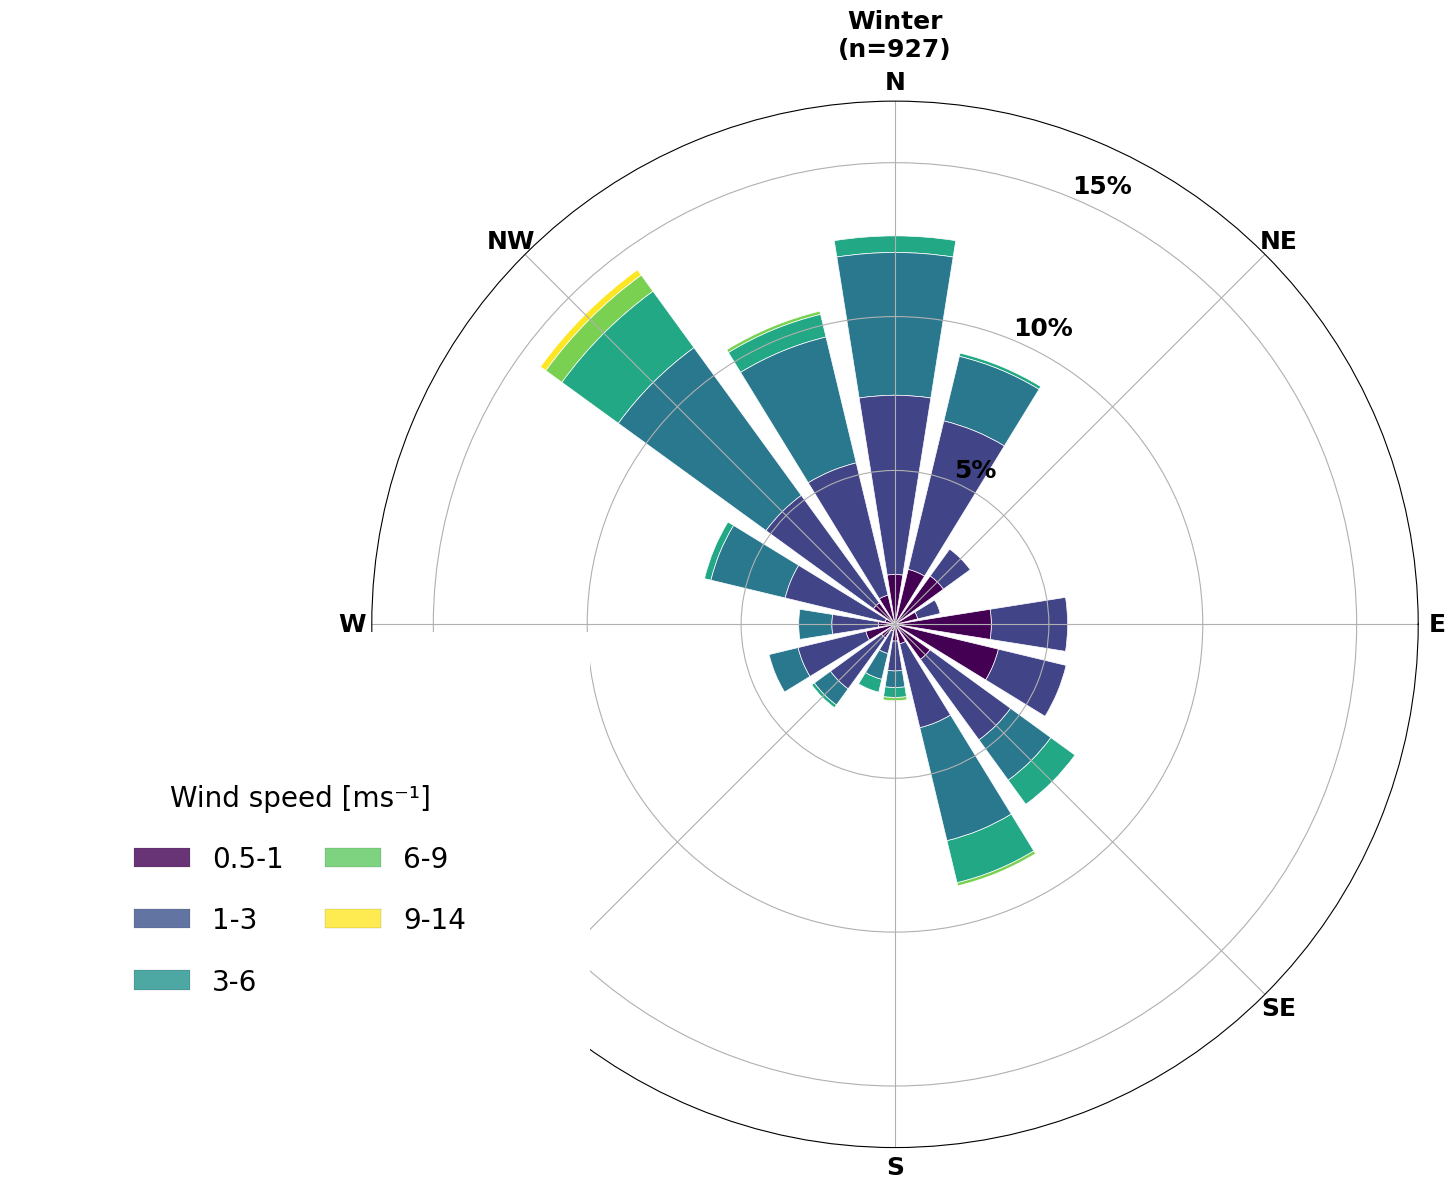

In [64]:
def export_as_png_high_quality_all_white(df='wind_SIAS_wint_filt', wind_speed_col='ws_2m', direction_col='wd_2m', datetime_col='DataOra', 
                                       filename='wind_rose_analysis.png'):
    """
    Version with white background for all subplots
    """

    
    # Define seasons
    def get_season(month):
        if month in [12, 1, 2]: return 'Winter'
        elif month in [3, 4, 5]: return 'Spring'
        elif month in [6, 7, 8]: return 'Summer'
        else: return 'Autumn'
    
    # Add season column
    df['season'] = df[datetime_col].dt.month.apply(get_season)
    
    # Create figure with white background
    fig = plt.figure(figsize=(18, 12), facecolor='white')
    
    # Define wind speed bins
    speed_bins = [0.5, 1,  3,  6,  9, 14]
    legend_labels = [f'{speed_bins[i]}-{speed_bins[i+1]}' for i in range(len(speed_bins)-1)]
    
    # Create custom colors
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=0, vmax=len(speed_bins)-2)
    legend_colors = [cmap(norm(i)) for i in range(len(speed_bins)-1)]
    
    # Plot wind roses in positions 1, 2, 3, 5, 6
    plot_positions = [1]
    plot_titles = ['Winter']
    
    for i, (pos, title) in enumerate(zip(plot_positions, plot_titles)):
        ax = plt.subplot(1, 1, pos, projection='windrose')
        ax.set_facecolor('white')  # White background for wind rose plots
        
        if title == 'Study period':
            data = df
        else:
            data = df[df['season'] == title]
        
        ws = data[wind_speed_col].values
        wd = data[direction_col].values
        
        # Filter out NaN values
        mask = ~np.isnan(ws) & ~np.isnan(wd)
        ws = ws[mask]
        wd = wd[mask]
        
        if len(ws) > 0:
            ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', 
                  linewidth=0.5, bins=speed_bins, cmap=cmap)
        
        # Set wind frequency values font size (radial labels)
        ax.set_yticks([ 5, 10, 15, 20])
        ax.set_yticklabels(['5%', '10%', '15%', '20%'], fontsize=18, fontweight='bold')
        
        # Set wind sectors/directions font size (angular labels)
        ax.set_xticklabels(['E', 'NE','N','NW' , 'W', 'SW', 'S','SE' ], fontsize=18, fontweight='bold')
        
        ax.set_ylim(0, 17)
        ax.set_title(f'{title}\n(n={len(ws)})', fontsize=18, fontweight='bold', pad=10)
    
    # Create legend in tile 4 (position 4) with two columns
    ax_legend = plt.subplot(2, 3, 4)
    ax_legend.set_facecolor('#ffffff')  # WHITE BACKGROUND
    

    # Remove axes
    ax_legend.set_xticks([])
    ax_legend.set_yticks([])
    for spine in ax_legend.spines.values():
        spine.set_visible(False)
    
    # Add title
    #ax_legend.text(0.5, 0.95, 'Legend', transform=ax_legend.transAxes,
     #             fontsize=18, fontweight='bold', ha='center', va='top')
    
    # Create legend elements
    legend_elements = [Patch(facecolor=color, edgecolor='black', linewidth=0.1, 
                           label=label, alpha=0.8) 
                      for color, label in zip(legend_colors, legend_labels)]
    
    # Create two-column legend
    legend = ax_legend.legend(
        handles=legend_elements,
        title='Wind speed [ms⁻¹]',
        loc='center',
        fontsize=20,
        title_fontsize=20,
        frameon=True,
        fancybox=True,
        shadow=False,
        facecolor='white',
        edgecolor='white',
        borderpad=1.2,
        labelspacing=1.2,
        ncol=2,
        columnspacing=1.5
    )
    
    #legend.get_title().set_fontweight('bold')
    
    # Add informative text
    #ax_legend.text(0.5, 0.05, 'Frequency circles: 0%, 5%, 10%, 15%', 
     #             transform=ax_legend.transAxes, fontsize=10, 
    #              ha='center', va='bottom', style='italic')
    
    # Main title
   # plt.suptitle('Seasonal Wind Rose Analysis', fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    
    # Export as PNG with white background
    plt.savefig(filename, 
                dpi=300,
                format='png',
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none',
                transparent=False)
    
    print(f"Figure exported as '{filename}' with 300 DPI and white background")
    
    plt.show()
    return fig
# Usage with all white backgrounds:
fig = export_as_png_high_quality_all_white(wind_SIAS_wint_filt, filename='wind_rose_SIAS_wint.png')

In [ ]:
# Apply sector classification
CG_wind_wint_filt['Wind_Sector'] = CG_wind_wint_filt['wind_direction'].apply(direction_to_sector)

print("Wind Sector Distribution:")
print(CG_wind_wint_filt['Wind_Sector'].value_counts().sort_index())

In [66]:
CG_wind_wint_filt['wind_speed'].max()


np.float64(23.6)

/tmp/ipykernel_1575/1539191649.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


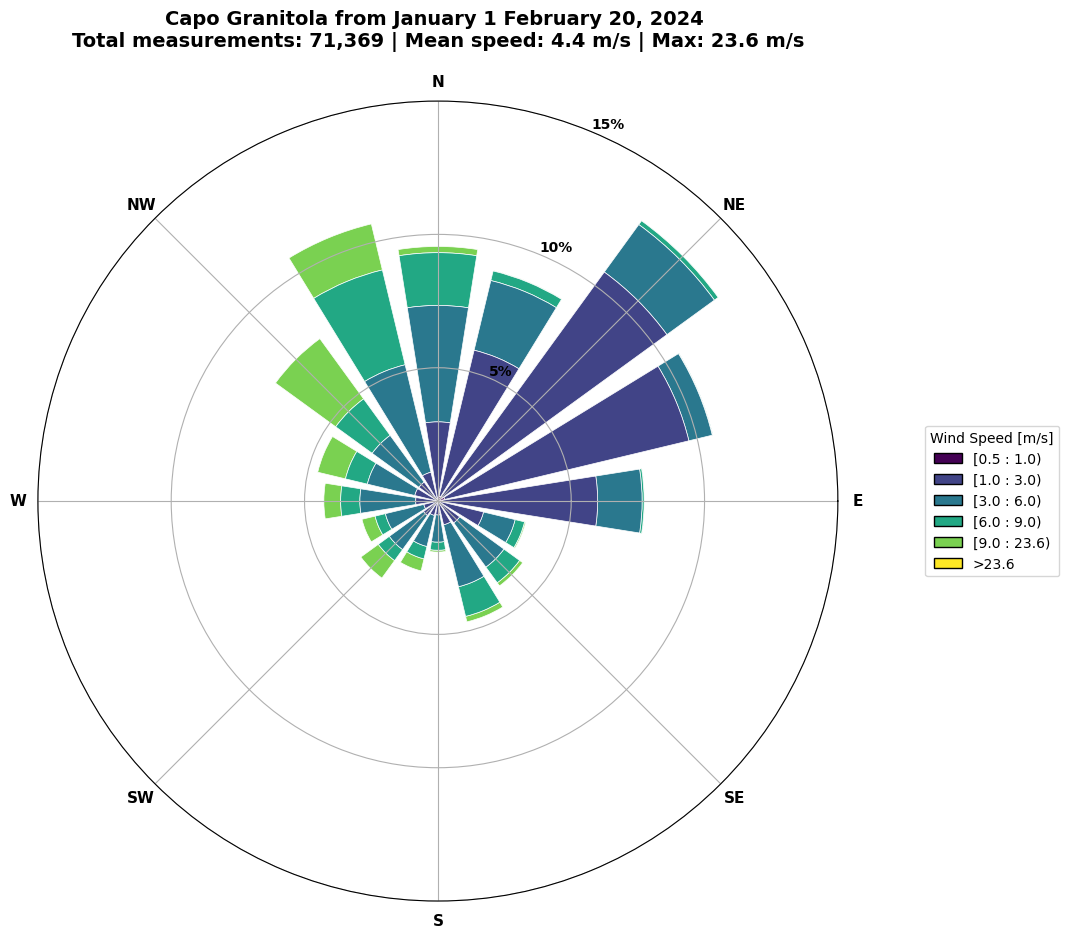

In [49]:

# Extract wind speed and direction
ws = CG_wind_wint_filt['wind_speed'].values
wd = CG_wind_wint_filt['wind_direction'].values

# Define custom wind speed bins (in m/s)
# Common categories 
speed_bins = [0.5, 1, 3, 6, 9, 23.6]  #


# Create bin labels
bin_labels = [
    '0.5-1',     
    '1-3',       
    '3-6',       
    '6-9',       
    '9-23.6'      
    ]

# Create wind rose
fig = plt.figure(figsize=(12, 10))
ax = WindroseAxes.from_ax(fig=fig)

# Plot with custom bins
bars = ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', 
              linewidth=0.5, bins=speed_bins, cmap=plt.cm.viridis)

# Customize frequency circles (radial grid)
# Set specific frequency values to display
ax.set_yticks([5, 10, 15])  # Frequencies in percent
ax.set_yticklabels(['5%', '10%', '15%'], fontsize=10, fontweight='bold')

# Set radial limits
ax.set_ylim(0, 15)  # Show up to 30% frequency

# Customize directional labels
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'], 
                   fontsize=11, fontweight='bold')

# Customize legend with bin labels
legend = ax.legend(title='Wind Speed [m/s]', loc='center left', 
                   bbox_to_anchor=(1.1, 0.5), labels=bin_labels)

# Add statistics
total_points = len(ws)
mean_speed = np.mean(ws)
max_speed = np.max(ws)

plt.title(f'Capo Granitola from January 1 February 20, 2024 \nTotal measurements: {total_points:,} | Mean speed: {mean_speed:.1f} m/s | Max: {max_speed:.1f} m/s', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

np.float64(15.0)

/tmp/ipykernel_1575/217682534.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


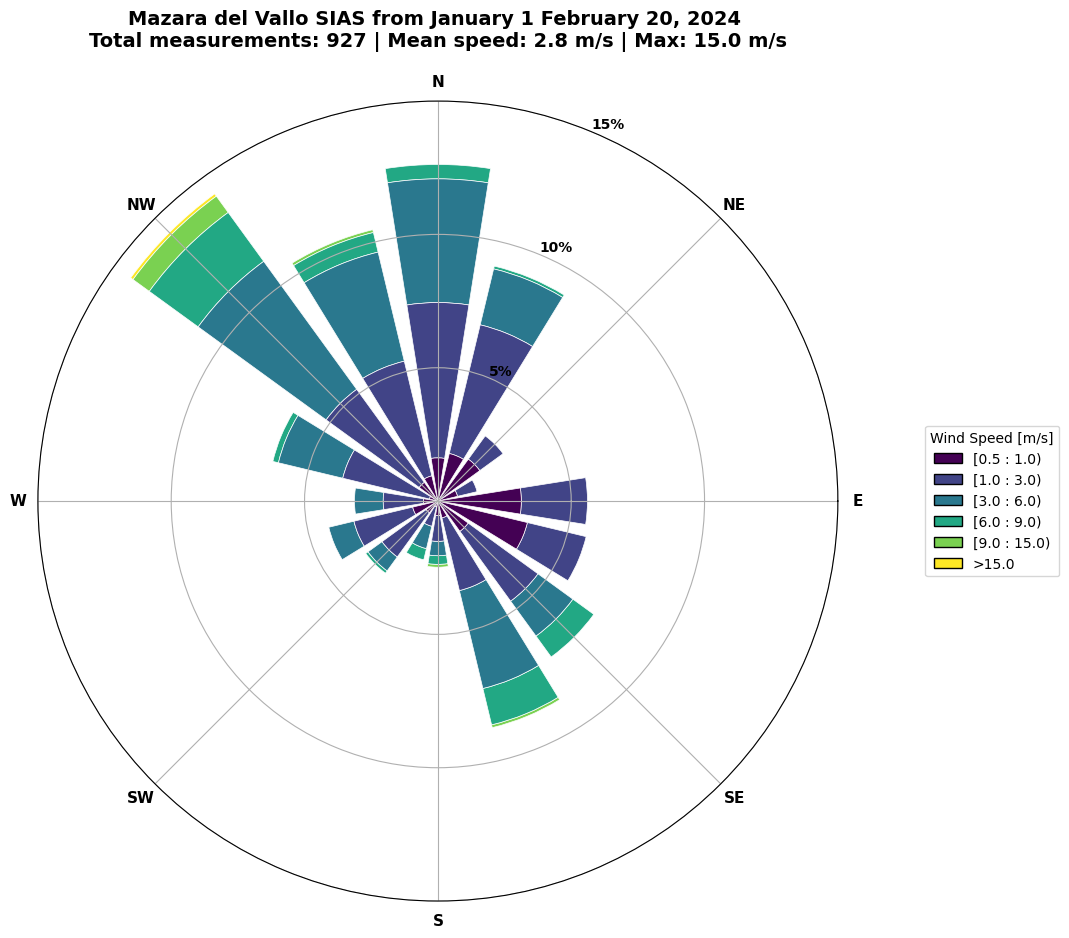

In [68]:

# Extract wind speed and direction
ws1 = wind_SIAS_wint_filt['ws_2m'].values
wd1 = wind_SIAS_wint_filt['wd_2m'].values

# Define custom wind speed bins (in m/s)
# Common categories 
speed_bins = [0.5, 1, 3, 6, 9, wind_SIAS_wint_filt['ws_2m'].max()]  #


# Create bin labels
bin_labels = [
    '0.5-1',     
    '1-3',       
    '3-6',       
    '6-9',       
    '9-15'      
    ]

# Create wind rose
fig = plt.figure(figsize=(12, 10))
ax = WindroseAxes.from_ax(fig=fig)

# Plot with custom bins
bars = ax.bar(wd1, ws1, normed=True, opening=0.8, edgecolor='white', 
              linewidth=0.5, bins=speed_bins, cmap=plt.cm.viridis)

# Customize frequency circles (radial grid)
# Set specific frequency values to display
ax.set_yticks([5, 10, 15])  # Frequencies in percent
ax.set_yticklabels(['5%', '10%', '15%'], fontsize=10, fontweight='bold')

# Set radial limits
ax.set_ylim(0, 15)  # Show up to 30% frequency

# Customize directional labels
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'], 
                   fontsize=11, fontweight='bold')

# Customize legend with bin labels
legend = ax.legend(title='Wind Speed [m/s]', loc='center left', 
                   bbox_to_anchor=(1.1, 0.5), labels=bin_labels)

# Add statistics
total_points = len(ws1)
mean_speed = np.mean(ws1)
max_speed = np.max(ws1)

plt.title(f'Mazara del Vallo SIAS from January 1 February 20, 2024 \nTotal measurements: {total_points:,} | Mean speed: {mean_speed:.1f} m/s | Max: {max_speed:.1f} m/s', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()